<a href="https://colab.research.google.com/github/derek-shing/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/module1-scrape-and-process-data/LS_DS_121_Scrape_and_process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2018 talks

In [0]:
url = 'https://us.pycon.org/2018/schedule/talks/list/'

In [0]:
import requests
import bs4

res = requests.get(url)
type(res)

In [0]:
res.text

In [0]:
soup  = bs4.BeautifulSoup(res.text)

soup

In [0]:
soup.select('h2')

In [0]:
first = soup.select('h2')[0]
last = soup.select('h2')[-1]

first

In [0]:
first.text.strip()
last.text.strip()

In [0]:
first.text

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

In [0]:
titles =[]

for tag in soup.select('h2'):
  tag.text.strip()
  titles.append(tag.text.strip())
  
  
titles

for title in titles:
  if len(title) > 80:
    print(title,'\n')
  

### 2. List Comprehension

In [0]:
titles = [tag.text.strip() for tag in soup.select('h2')]

longtitles = [title for title in titles if len(title)>80]

longtitles

### 3. Filter with named function

In [0]:
def long(title):
  return len(title)>80

list(filter(long,titles))

### 4. Filter with anonymous function

In [0]:
list(filter(lambda t:len(t)>80, titles))

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [0]:
import pandas as pd

df = pd.DataFrame({'title':titles})

#df[len(df.title)>80]

df[df.title.str.len()>80]

## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

### title length

In [46]:
df['title length'] = df.title.str.len()
df

,title,long title,first letter,title word count,title length
0,A Bit about Bytes: Understanding Python Bytecode,False,A,7,48
1,Adapting from Spark to Dask: what to expect,False,A,8,43
2,All in the timing: How side channel attacks work,False,A,9,48
3,Analyzing Data: What pandas and SQL Taught Me ...,False,A,12,69
4,A practical guide to Singular Value Decomposit...,False,A,9,59
5,Augmenting Human Decision Making with Data Sci...,False,A,7,50
6,Automating Code Quality,False,A,3,23
7,Bayesian Non-parametric Models for Data Scienc...,False,B,8,59
8,Behavior-Driven Python,False,B,2,22
9,Beyond scraping: how to use machine learning w...,False,B,14,80


### long title

In [0]:
df['long title'] = df.title.str.len()>80

df

### first letter

In [0]:
df['first letter'] = df.title.str[0]

df

### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [0]:
!pip install textstat

In [0]:
import textstat

first = df.title.values[0]
last = df.title.values[-1]

df['title word count']=df.title.apply(textstat.lexicon_count)

df

## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [0]:
df = df.rename({})

## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

In [47]:
df.sort_values(by='title word count', ascending=False)

,title,long title,first letter,title word count,title length
57,Practical Sphinx,False,P,2,16
8,Behavior-Driven Python,False,B,2,22
52,Love your bugs,False,L,3,14
6,Automating Code Quality,False,A,3,23
21,Coding through Adversity,False,C,3,24
76,Taking Django Async,False,T,3,19
44,HOWTO Write a Function,False,H,4,22
87,User focused API Design,False,U,4,23
58,Programming microbes using Python,False,P,4,33
69,Reinventing the Parser Generator,False,R,4,32


Titles sorted reverse alphabetically

### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

In [49]:
df['first letter'].value_counts()

P    12
B    11
T    11
C     8
D     7
A     7
S     6
E     5
H     5
F     3
R     3
L     3
G     2
U     2
W     2
V     2
O     2
i     1
"     1
Y     1
I     1
Name: first letter, dtype: int64

Percentage of talks with long titles

In [52]:
df['long title'].value_counts(normalize= True)

False    0.947368
True     0.052632
Name: long title, dtype: float64

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

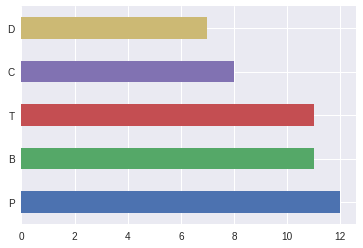

In [57]:
%matplotlib inline

df['first letter'].value_counts().head(5).plot.barh()

Histogram of title lengths, in characters

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count
- description grade level (use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** these questions:
- Which descriptions could fit in a tweet?
- What's the distribution of grade levels? Plot a histogram.

